{3: 'Falling', 2: 'Sitting', 4: 'Cramps', 5: 'Running', 0: 'Standing', 1: 'Walking'}
__KNN__


/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/lzark/.local/lib/python3.6/site-packages/pandas

The prediction [4 0 0 ... 4 4 0]
KNN Confusion Matrix:
[[849   5  54  99  92  34]
 [  2  88  30   3   3   1]
 [ 21  21 438 113  24   2]
 [ 38   5 135 581 140  19]
 [ 58   6  61 148 538  72]
 [ 42   2  11  55 100 206]] 



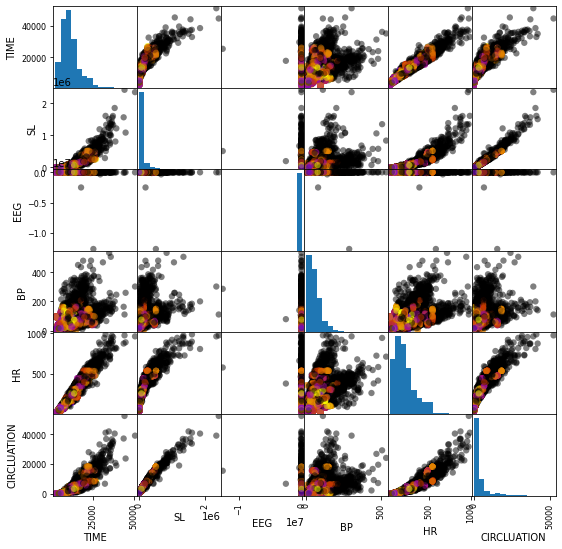

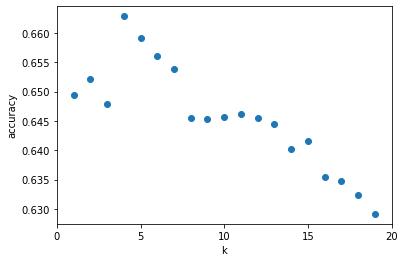

In [4]:
"""
Applied Machine Learning Project_2: Using Logistic regression and Support Vector Machines (SVM)

COPYRIGHT (C) 2020 John Fahringer (jrf5001@yahoo.com) and Naomi Burhoe (naomi.burhoe@hotmail.com)
All rights reserved.

This program tries to classify a portion of our selected data set using the mentioned supervised
learning algorithms.
"""
import pandas as pd

from knn import _knn
from logistic import _logistic
from SVM import _SVM

falldetection = pd.read_csv('data/falldetection.csv')
falldetection.head()

# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fall_type = dict(zip(falldetection.ACTIVITY.unique(), falldetection.NAME.unique()))
print(lookup_fall_type)

X = falldetection[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']]
y = falldetection['ACTIVITY']

_knn(X, y)


In [2]:
_logistic(X, y, lookup_fall_type)



__logistic regression__
lr.coef_: [[-1.83132130e-04  1.89791221e-06 -6.99272692e-04  5.76036329e-06
  -2.29210607e-07 -1.70354820e-04]
 [-1.46249524e-04 -4.17803624e-06  2.21936493e-05 -7.24698297e-07
  -9.75651741e-07  1.06595740e-05]
 [ 7.91550870e-05  1.73274899e-06  1.93775377e-04  1.47590065e-06
  -1.29944798e-06  7.88557214e-06]
 [ 1.20311986e-04  3.85178955e-07  2.09919915e-04 -8.92534949e-06
   1.65923666e-06  6.51631808e-05]
 [ 1.27271879e-04 -7.53547065e-07  2.23514615e-04  2.32725472e-06
   1.26730438e-07  7.00754282e-05]
 [ 2.64270192e-06  9.15743147e-07  4.98691368e-05  8.65291255e-08
   7.18343230e-07  1.65710653e-05]]
lr.intercept_: [-7.71181032e-09 -1.36495457e-08  7.77112291e-08 -2.74910021e-08
  1.99783431e-08 -4.88372141e-08]
Training set score: 0.38
Test set score: 0.37
Cramps
The prediction [4 4 0 ... 3 3 4]

Logistic Regression Confusion Matrix:
[[827   0   0 113 194   0]
 [ 36   0   0   4  77   0]
 [141   0   0 100 344   0]
 [271   0   0 306 370   0]
 [277   0  

/home/lzark/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



__SVM__


/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/lzark/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/lzark/.local/lib/python3.6/site-packages/pandas

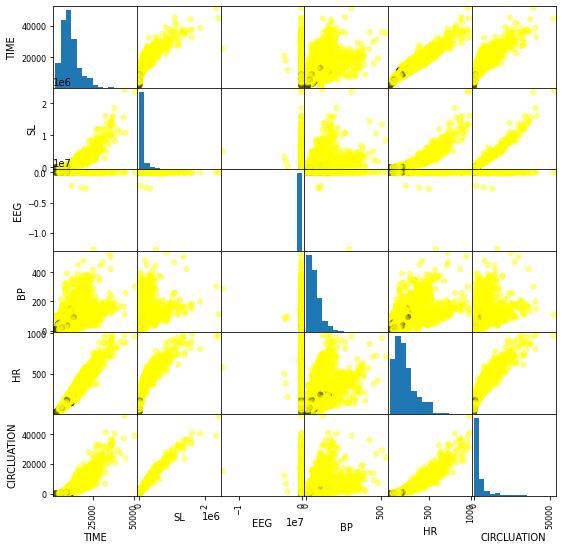

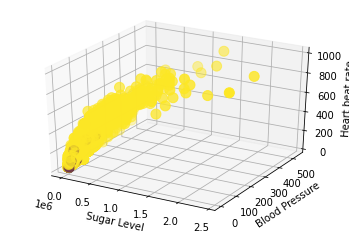

/home/lzark/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM Training set score: 80.70%
Linear SVM Test set score: 81.10%
[[ 3.41566510e-04 -1.31283709e-04 -7.60562273e-05  9.99726611e-03
  -1.59188385e-02  3.04170953e-03]]
[-0.00178136]

Linear SVM Confusion Matrix:
[[   0  117]
 [ 657 3322]] 

SVM Gaussian Training set score: 96.87%
SVM Gaussian Test set score: 97.14%

NONLinear SVM Confusion Matrix:
[[   0  117]
 [   0 3979]] 



In [3]:
_SVM(X, y)